# Text Processing

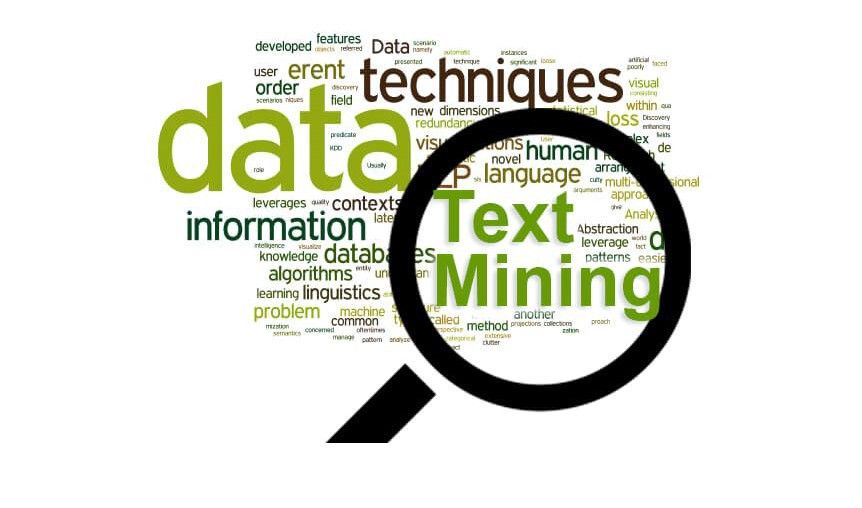

## Load Data

Data yang akan digunakan dalam sesi ini adalah data tweet, yang dapat diakses melalui link berikut https://www.kaggle.com/thoughtvector/customer-support-on-twitter/version/10

In [1]:
## read data
import pandas as pd
import nltk
import string
pd.options.mode.chained_assignment = None

full_df = pd.read_csv("sample.csv", nrows=5000)
df = full_df[["text"]]
df["text"] = df["text"].astype(str)
full_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregar...,119236,NaN
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm su...,119238,NaN
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've...,119243,119240.0


### Lower Casing

In [2]:
df["text_lower"] = df["text"].str.lower()
df.head()

,text,text_lower
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...


### Remove punctuation

In [3]:
df.drop(["text_lower"], axis=1, inplace=True)

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,text,text_wo_punct
0,@AppleSupport causing the reply to be disregar...,AppleSupport causing the reply to be disregard...
1,@105835 Your business means a lot to us. Pleas...,105835 Your business means a lot to us Please ...
2,@76328 I really hope you all change but I'm su...,76328 I really hope you all change but Im sure...
3,@105836 LiveChat is online at the moment - htt...,105836 LiveChat is online at the moment https...
4,@VirginTrains see attached error message. I've...,VirginTrains see attached error message Ive tr...


### Stopword Removal

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

### Stemming

In [7]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text"].apply(lambda text: stem_words(text))
df.head()

,text,text_wo_punct,text_stemmed
0,@AppleSupport causing the reply to be disregar...,AppleSupport causing the reply to be disregard...,@applesupport caus the repli to be disregard a...
1,@105835 Your business means a lot to us. Pleas...,105835 Your business means a lot to us Please ...,@105835 your busi mean a lot to us. pleas DM y...
2,@76328 I really hope you all change but I'm su...,76328 I really hope you all change but Im sure...,@76328 I realli hope you all chang but i'm sur...
3,@105836 LiveChat is online at the moment - htt...,105836 LiveChat is online at the moment https...,@105836 livechat is onlin at the moment - http...
4,@VirginTrains see attached error message. I've...,VirginTrains see attached error message Ive tr...,@virgintrain see attach error message. i'v tri...


### Lemmatization

In [9]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,text,text_wo_punct,text_stemmed,text_lemmatized
0,@AppleSupport causing the reply to be disregar...,AppleSupport causing the reply to be disregard...,@applesupport caus the repli to be disregard a...,@AppleSupport causing the reply to be disregar...
1,@105835 Your business means a lot to us. Pleas...,105835 Your business means a lot to us Please ...,@105835 your busi mean a lot to us. pleas DM y...,@105835 Your business mean a lot to us. Please...
2,@76328 I really hope you all change but I'm su...,76328 I really hope you all change but Im sure...,@76328 I realli hope you all chang but i'm sur...,@76328 I really hope you all change but I'm su...
3,@105836 LiveChat is online at the moment - htt...,105836 LiveChat is online at the moment https...,@105836 livechat is onlin at the moment - http...,@105836 LiveChat is online at the moment - htt...
4,@VirginTrains see attached error message. I've...,VirginTrains see attached error message Ive tr...,@virgintrain see attach error message. i'v tri...,@VirginTrains see attached error message. I've...


### BoW

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv_object = CountVectorizer(ngram_range=(1,3), analyzer= 'word')
cv_object.fit(df["text"].values.tolist())
train_cv = cv_object.transform(df["text"].values)
print(cv_object.get_feature_names_out())
print(train_cv.toarray())

['031' '031 031' '031 031 option' ... 'zip code' 'zip code and'
 'znuu1vjn9r']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(ngram_range=(1,3), use_idf= True , analyzer= 'word')
tfv.fit(df["text"].values.tolist())
train_tfidf = tfv.transform(df["text"].values)
print(tfv.get_feature_names_out())
print(train_tfidf.toarray())

['031' '031 031' '031 031 option' ... 'zip code' 'zip code and'
 'znuu1vjn9r']
[[0.       0.       0.       ... 0.       0.       0.      ]
 [0.       0.       0.       ... 0.132815 0.132815 0.132815]
 [0.       0.       0.       ... 0.       0.       0.      ]
 ...
 [0.       0.       0.       ... 0.       0.       0.      ]
 [0.       0.       0.       ... 0.       0.       0.      ]
 [0.       0.       0.       ... 0.       0.       0.      ]]
